# Week #7 in Machine Learning
### Applications of Unsupervised Machine Learning Models

Supose you own a supermarket which offers loyalty cards to the customers. From these cards, you get the customer demograhic data. You also get their spending data which you assign a score based on parameters that you define based on the customer behavior. 

#### Problem statement
You want to understadn the customers according ot their differnt atttributes and group them.

In [36]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 


In [4]:
# Loading in the Data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [7]:
nRows, nColumns = df.shape
print(f"There are {nRows} rows and {nColumns} columns in our dataset")

There are 200 rows and 5 columns in our dataset


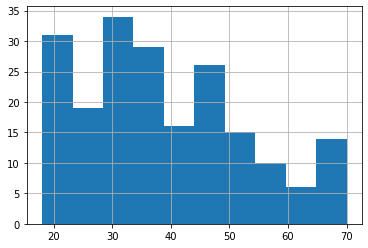

In [30]:
df['Age'].hist();

In [33]:
Females, Males = df['Gender'].value_counts()
print(f'There are {Females} Female customers and {Males} Male customers in the dataset')

There are 112 Female customers and 88 Male customers in teh dataset


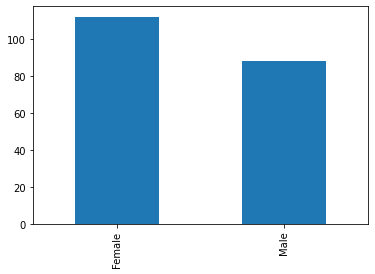

In [21]:
ax = df['Gender'].value_counts().plot.bar()

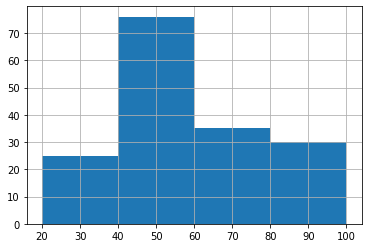

In [26]:
df['Spending Score (1-100)'].hist(bins=[20, 40, 60, 80, 100]);

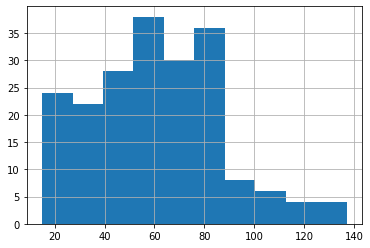

In [28]:
df['Annual Income (k$)'].hist();

In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### Summary
- A majority of the customers are aged between 20 and 40 years.
- There are more females than male customer (112, 88 respectively).
- The dataset does not have missing values. 

#### Let's look at a heatmap

<AxesSubplot:>

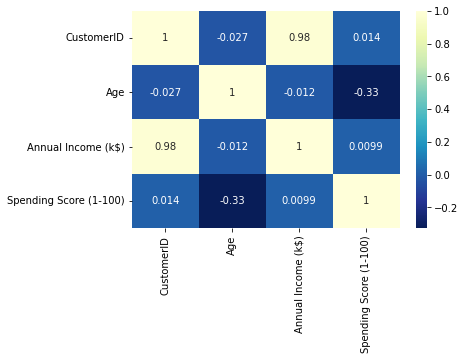

In [39]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu_r")

## Clustering
### Cluster on two features

In [41]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Next we look at how this data is scattered using a scatterplot below. After that we cluster the data using Kmeans and plot the results.

/home/lph4/.environment/generalLearning/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


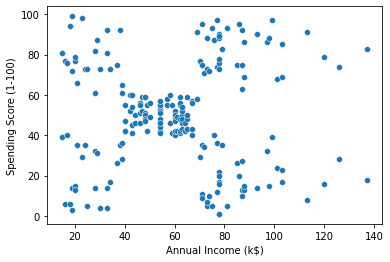

In [49]:
# Scatter Plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)']);

In [52]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

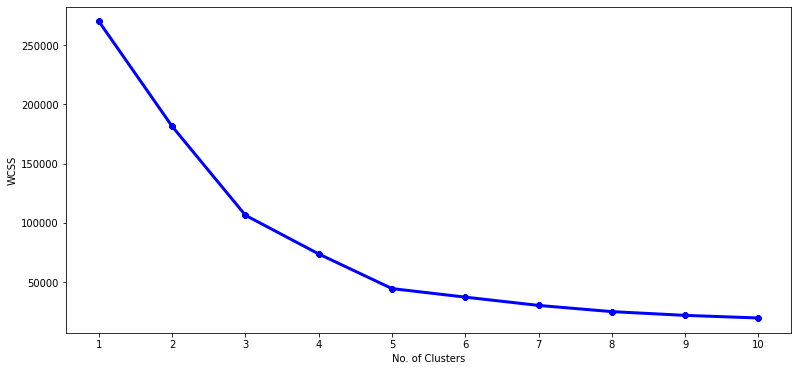

In [55]:
# plot
plt.figure(figsize=(13, 6))
plt.plot(range(1, 11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='blue', marker='8')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [56]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

/tmp/ipykernel_4783/3215722182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = y


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


In [70]:
df1_clusters = df1['Label'].value_counts()
df1_clusters

4    81
0    39
2    35
1    23
3    22
Name: Label, dtype: int64

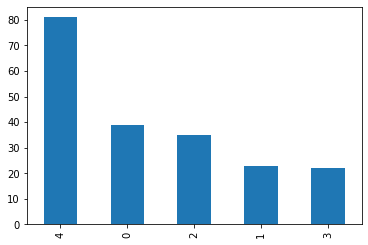

In [71]:
df1_clusters.plot.bar();

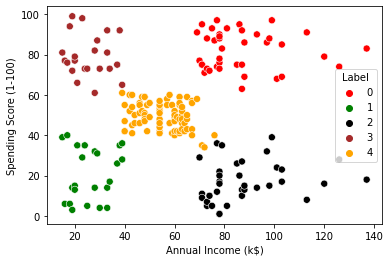

In [72]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50,
               palette =['red', 'green', 'black', 'brown', 'orange']);

### Cluster on three features

In [75]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [77]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

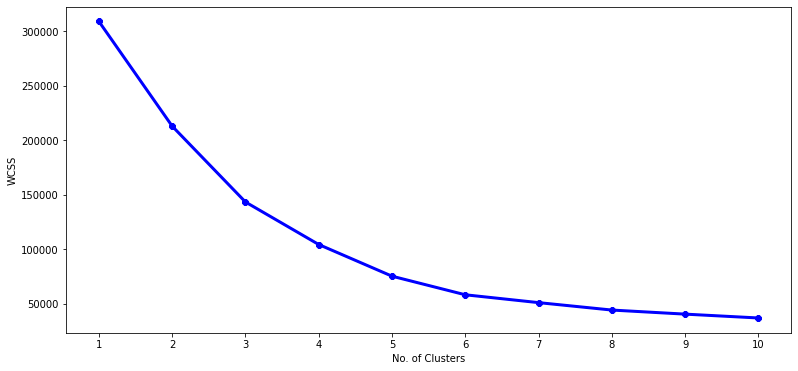

In [78]:
plt.figure(figsize=(13, 6))
plt.plot(range(1, 11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='blue', marker='8')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [79]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

/tmp/ipykernel_4783/37782510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label'] = y


,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,4
2,16,6,20,3
3,16,77,23,4
4,17,40,31,3


In [80]:
df2_clusters = df2['Label'].value_counts()
df2_clusters

2    79
0    39
1    36
3    23
4    23
Name: Label, dtype: int64

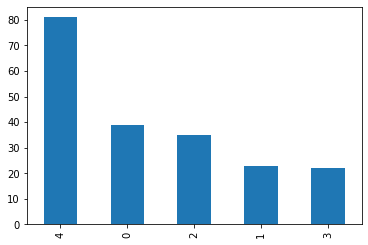

In [81]:
df1_clusters.plot.bar();

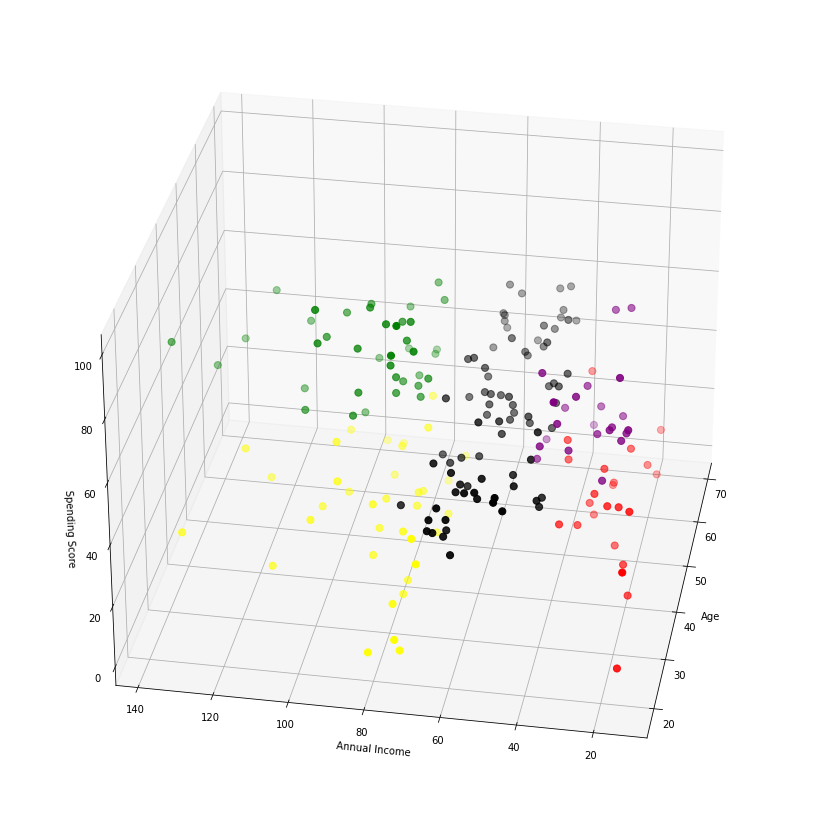

In [85]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], 
           df2['Spending Score (1-100)'][df2['Label']==0], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], 
           df2['Spending Score (1-100)'][df2['Label']==1], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], 
           df2['Spending Score (1-100)'][df2['Label']==2], c='black', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], 
           df2['Spending Score (1-100)'][df2['Label']==3], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], 
           df2['Spending Score (1-100)'][df2['Label']==4], c='purple', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()